# 타이타닉 데이터 분석
- pclass:Passenger Class, 승객 등급
- survived: 생존 여부(생존은 1, 아닌 경우는 0)
- name: 승객 이름
- sex: 승객 성별
- age: 승객 나이
- sibsp: 동승한 형제 또는 배우자 수
- parch: 동승한 부모 또는 자녀 수
- ticket: 티켓 번호
- fare: 승객 지불 요금
- cabin: 선실 이름
- embarked: 승선항(C=쉘 부르크, Q=퀸즈타운, S=사우스 햄튼)
- body: 사망자 확인 번호
- home.dest: 고향/목적지

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 현재작업자료의 하위의 data폴더에 titanic.xls 자료 있음
raw_data = pd.read_excel('data/21.09.13 학습자료/9월14일 집계EDA실습 및 분류분석 미션포함/data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [44]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [45]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [46]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [47]:
#승객의 나이 확인
print('Oldest Passenger was of:',raw_data['age'].max(),'Years')
print('Youngest Passenger was of:',raw_data['age'].min(),'Years')
print('Average Age on the ship:',raw_data['age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.1667 Years
Average Age on the ship: 29.8811345124283 Years


## [미션] 승객 fare 확인

In [48]:
print('가장 비싼 표값:',raw_data['fare'].max(),'fare')
print('가장 싼 표값:',raw_data['fare'].min(),'fare')
print('평균 표값:',raw_data['fare'].mean(),'fare')

가장 비싼 표값: 512.3292 fare
가장 싼 표값: 0.0 fare
평균 표값: 33.29547928134572 fare


## [생존율 시각화]

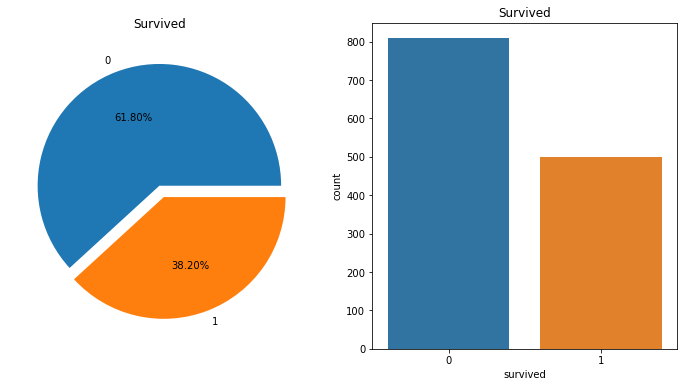

In [49]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## [미션: 위의 차트를 이용하여 pclass 집계]

In [50]:
raw_data.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

## [미션: 성별별 생존자수 확인과 차트 작성]

In [51]:
raw_data.pivot_table('survived', 'sex')

,survived
sex,
female,0.727468
male,0.190985


## [미션: 성별별 생존자별 인원수]

<function matplotlib.pyplot.show(close=None, block=None)>

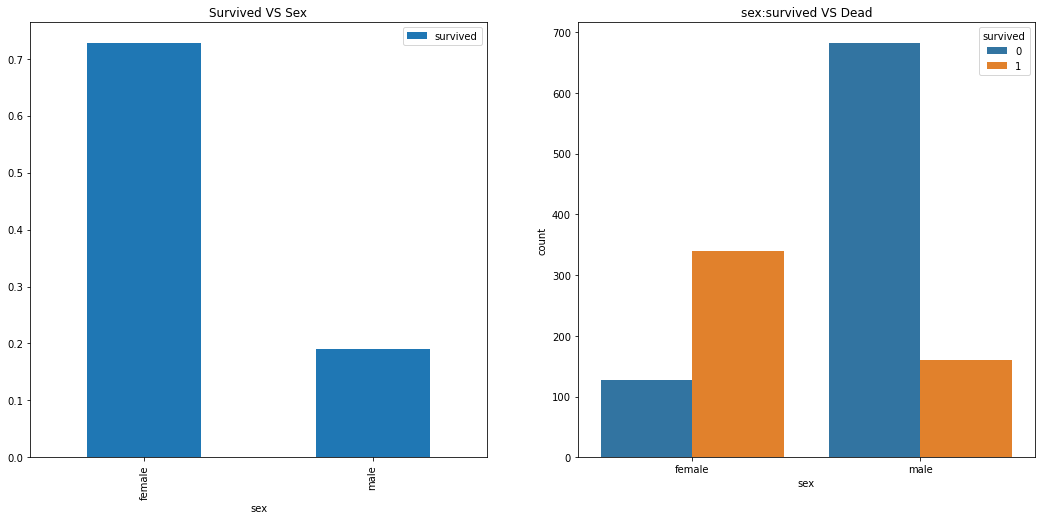

In [52]:
# 성별별 생존자 확인
# 성별로 여성이 70% 이상 더 생존한 것을 알 수 있고, 
# 성별로 남성은 100명 정도 생존, 400명 이상 사망, 
# 여성은 200명 이상 생존, 100명 이하 사망을 그래프로 볼 수 있다

f,ax = plt.subplots(1,2,figsize=(18,8))
raw_data[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('sex',hue='survived',data=raw_data,ax=ax[1])
ax[1].set_title('sex:survived VS Dead')
plt.show

## 미션, embarked 별로 생존자 확인

In [53]:
raw_data.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [54]:
raw_data.pivot_table('survived', 'embarked')

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604


In [55]:
# crosstab를 통한 개실등급별 생존자 확인
pd.crosstab(raw_data.pclass,raw_data.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


In [56]:
pd.crosstab(raw_data.embarked,raw_data.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
embarked,,,
C,120,150,270
Q,79,44,123
S,610,304,914
All,809,498,1307


## [미션] 성별별 생존자 확인을 crosstab로 실행

In [57]:
## 성별별, 선실등급별 생존자 확인
pd.crosstab([raw_data.sex,raw_data.survived],raw_data.pclass,margins=True).style.background_gradient(cmap='summer_r')

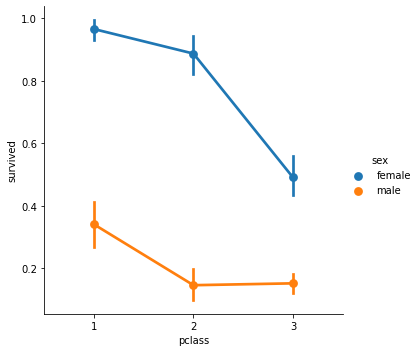

In [58]:
## Factorplot을 통해 객실등급과 생존자의 관계를 성별로 나누어봄
sns.factorplot('pclass','survived',hue='sex',data=raw_data)

## [히스토그램], 구간별 집계차트

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


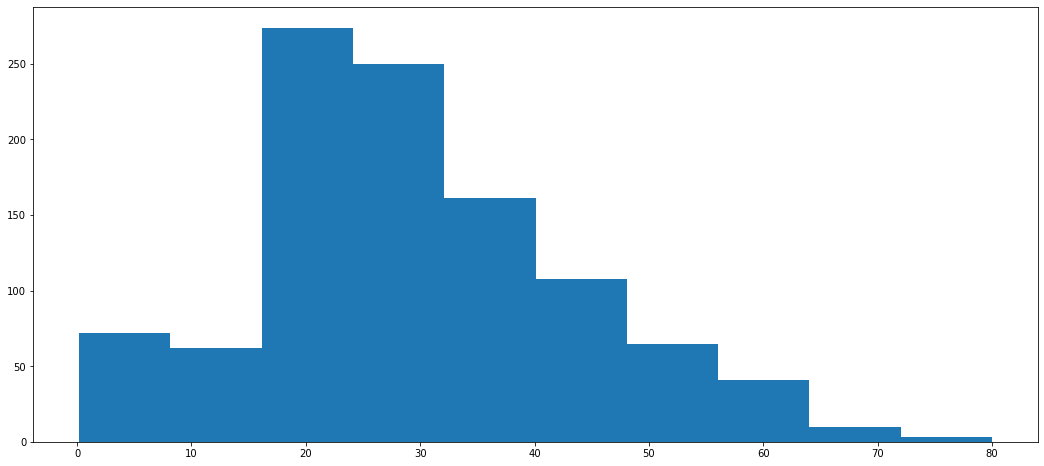

In [59]:
raw_data['age'].hist(bins=10,figsize=(18,8),grid=False);
raw_data.groupby('pclass').mean()

## [바이올린 플롯차트]
- 객실과 나이에 대한 생존자 비율, 성별과 나이에 대한 생존자비율확인
- 객실별로 1등급 객실의 30~40대 사이가 가장 생존자가 많아 보이고, 30대 남성과 여성이 생존자가 많은 것을 확인 할 수 있다.

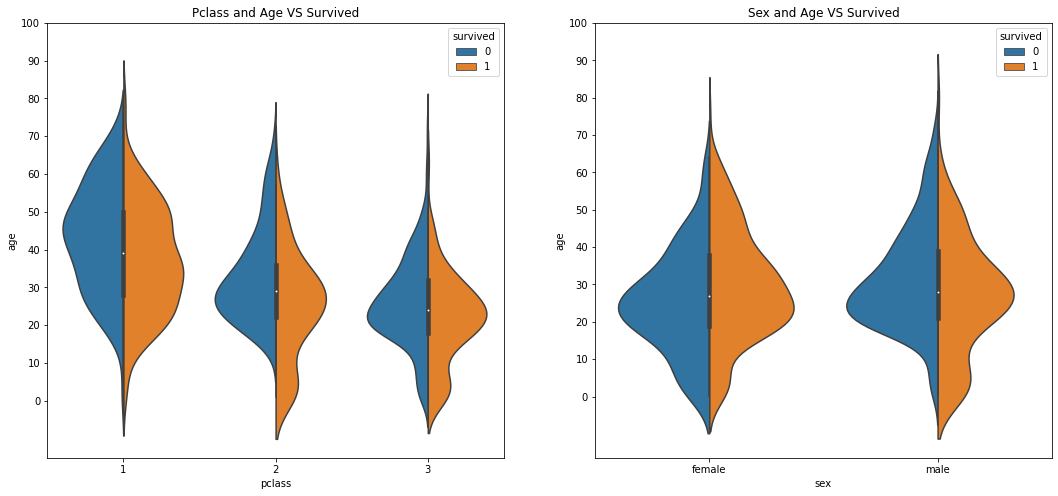

In [60]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# 1번 바이올린 플롯 : 클래스별 나이별 생존률 0사망 1생존
sns.violinplot("pclass","age",hue="survived",data=raw_data,split=True,ax=ax[0]) 
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))

# 2번 바이올린 플롯 : 성별별 나이별 생존률 0사망 1생존
sns.violinplot("sex","age",hue="survived",data=raw_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## 상관계수, 데이터간의 연관성을 구함

            pclass  survived       age     sibsp     parch      fare      body
pclass    1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629 -0.034642
survived -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244265       NaN
age      -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.178739  0.058809
sibsp     0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238 -0.099961
parch     0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539  0.051099
fare     -0.558629  0.244265  0.178739  0.160238  0.221539  1.000000 -0.043110
body     -0.034642       NaN  0.058809 -0.099961  0.051099 -0.043110  1.000000


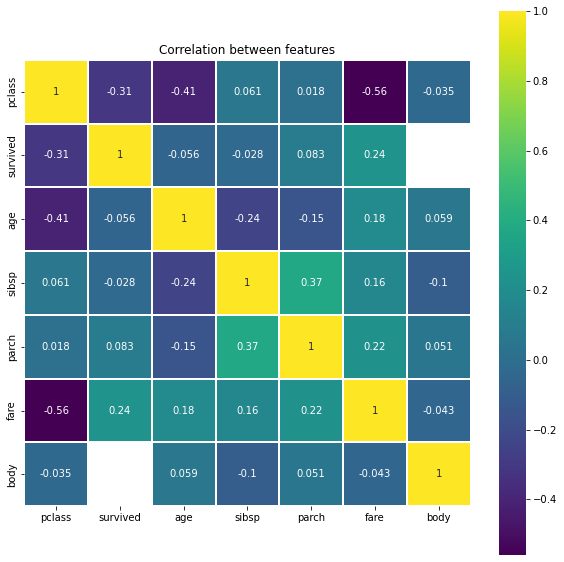

In [67]:
print(raw_data.corr()) ##피어슨 상관계수로 -1~1사이값임

plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

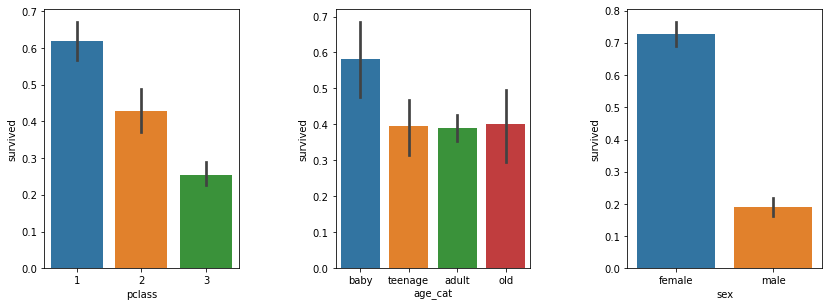

In [62]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
# 클래스별 생존률
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
# 나이대별(그룹화됨) 생존률
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
# 성별별 생존률
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

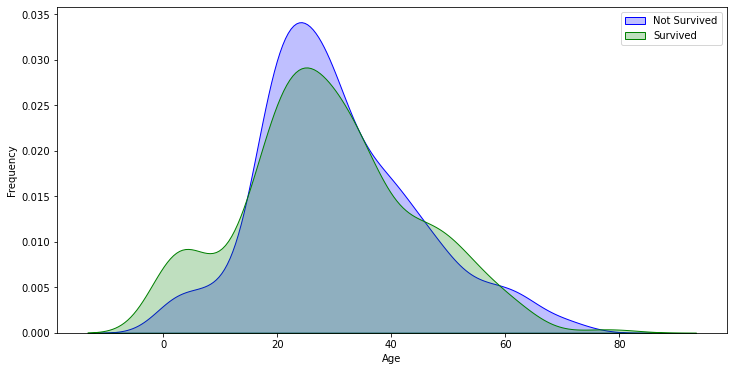

In [65]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())], 
                ax = ax, color="Blue", shade = True)
                # 생존여부 : 사망, 나이가 Null값이 아닌것
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())], 
                ax =g, color="Green", shade= True)
                # 생존여부 : 생존, 나이가 Null값이 아닌것
g.set_xlabel("Age")
g.set_ylabel("Frequency")   # 빈도
# plt.title('나이/생존여부 빈도') #한글패치후 적용
g = g.legend(["Not Survived","Survived"])

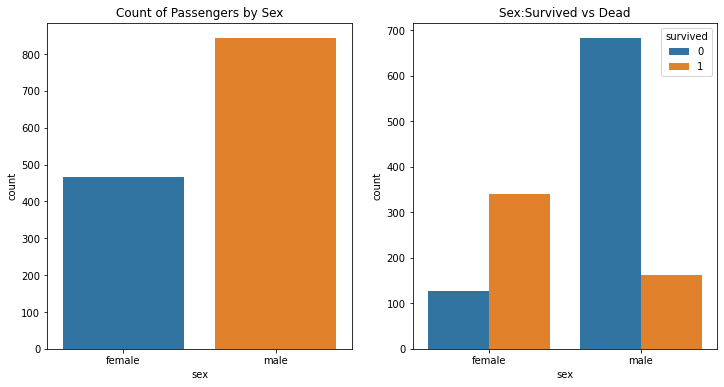

In [69]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')
# 성별별 인원수
sns.countplot('sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
# 성별별 생존여부
plt.show()

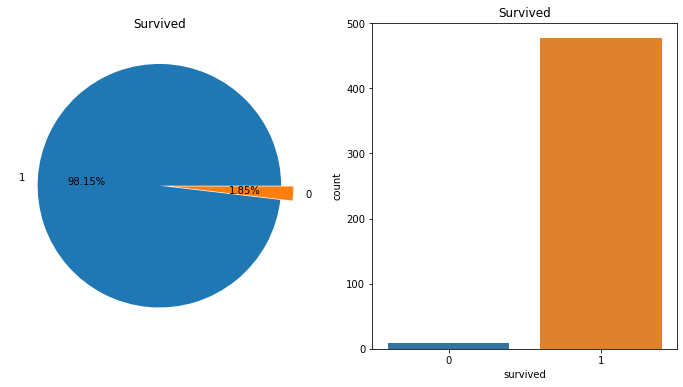

In [70]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
# 보트를 타고 살아남은 생존자 퍼센트(원형)

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
# 보트를 타고 살아남은 생존자 비율
plt.show()